# Team DataDudes - Progress Report

## AI Perceptions Across Professionals

**Team members:** \
Prathyush Sajith - psaji@uic.edu \
Syed Muqtadeer - smuqt2@uic.edu \
Muhsin Adan - madan6@uic.edu \
Ammaar Khan - akhan362@uic.edu \
Zain Farooq - zfaroo9@uic.edu 

# Project Introduction
In an era where **Artificial Intelligence (AI)** is rapidly transforming industries and daily life, understanding public perceptions of its risks, benefits, and societal implications is critical. This project leverages the 2022 Pew Research Center’s ATP (Wave 119) survey dataset to analyze how individuals perceive AI across diverse domains, with a focus on healthcare and workplace applications. The dataset, collected from **slightly over 11,000 U.S. adults**, captures nuanced attitudes through questions spanning AI’s role in **Medical diagnostics, Mental health support, Hiring practices, Workplace surveillance**, and ethical concerns like bias and fairness.

# Changes
Yes, the project’s scope has evolved since the initial proposal. Originally, the goal was to analyze AI perceptions among teenagers, but we shifted focus to **professionals** and adults in the workforce, specifically within healthcare and technology-driven industries.

# Data Cleaning
**Tools Used**:
- `pyreadstat` to read the `.sav` file into a pandas DataFrame.
- `pandas` for data manipulation.
- Saved as 'preprocess.py'

**Cleaning steps**:
- **Columns**: 150+ variables, including Likert-scale responses, categorical demographics, and open-text fields.
- **Granularity**: Individual-level responses to questions about AI perceptions, workplace dynamics, healthcare ethics, and demographics.
- Explicit missing codes (e.g., "Not sure," "Refused") were recoded as `NaN`.
- Implicit missingness (e.g., skipped conditional questions) was flagged using the survey’s skip logic documentation.


# Exploratary Data Analysis

Exploratory Data Analysis (EDA) in **Healthcare and Medicine** focuses on trends and public sentiments about emerging technologies in AI. Understanding perceptions of AI in this domain is critical, as trust directly impacts adoption rates, patient outcomes, and ethical implementation.

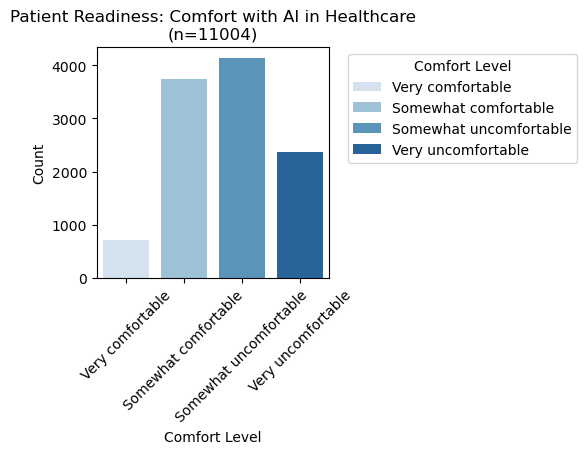

In [314]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv("W119preprocessed.csv")
comfort_dist = df['AIHCCOMF_W119'].value_counts(normalize=True).mul(100).round(1)
plt.figure(figsize=(3, 3))
sns.countplot(data=df, x='AIHCCOMF_W119', 
              order=["Very comfortable", "Somewhat comfortable", 
                     "Somewhat uncomfortable", "Very uncomfortable"], hue='AIHCCOMF_W119',
              palette="Blues")
plt.title("Patient Readiness: Comfort with AI in Healthcare\n(n={})".format(len(df)))
plt.legend(title="Comfort Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Comfort Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Comfort with AI in Healthcare**:
- **"Somewhat uncomfortable"** is the largest category (~4,000 respondents), indicating that nearly one-third of patients barely trust AI’s role in healthcare.  
- **"Somewhat comfortable** and **"Very comfortable"** together represent less than half of respondents, highlighting widespread **skepticism.**  
- A small but notable minority (~14% of total) are **"Very comfortable"**, suggesting early adopters or tech-optimists exist.  
- The majority (~68%) fall into the **middle or negative categories**, emphasizing the need for bridging trust gaps.  

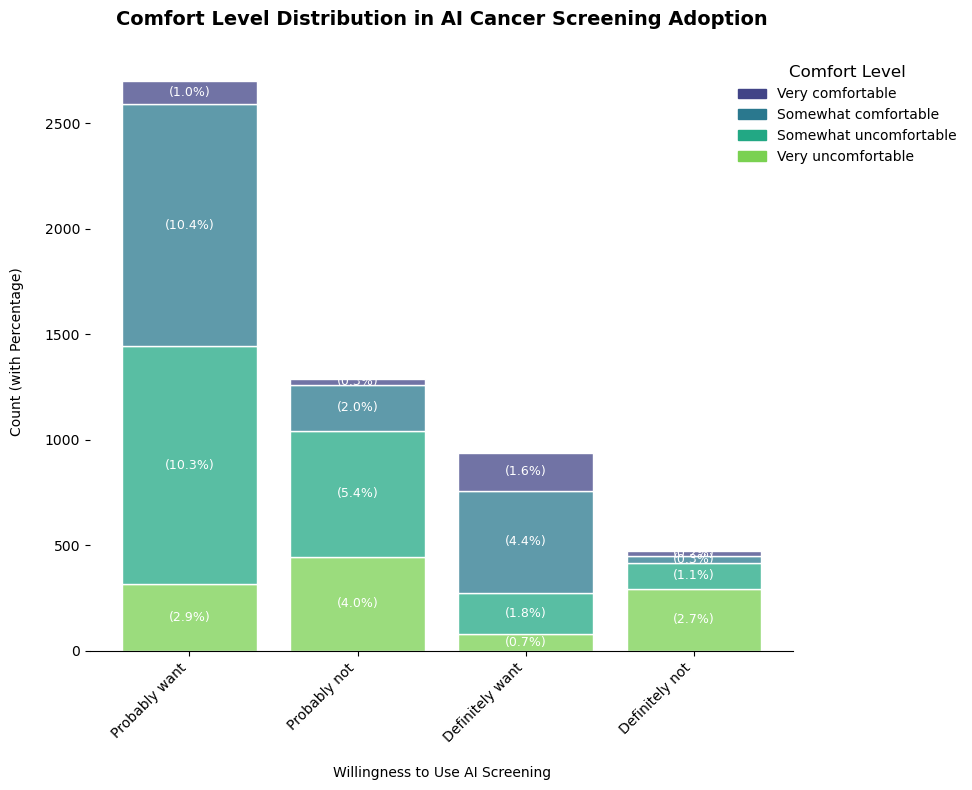

In [141]:
from matplotlib.patches import Patch

plt.figure(figsize=(10, 8))
ax = sns.histplot(
    data=df,
    x='SCDETECT3_W119',
    hue='AIHCCOMF_W119',
    multiple="stack",
    palette="viridis",
    edgecolor="white",
    linewidth=1,
    shrink=.8,
    hue_order=["Very comfortable", "Somewhat comfortable",
               "Somewhat uncomfortable", "Very uncomfortable"],
    discrete=True,
    legend=False
)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., p.get_y() + height/2,
                f'({height/total:.1%})',
                ha="center", va="center", fontsize=9, color='white')

sns.despine(left=True)
plt.title("Comfort Level Distribution in AI Cancer Screening Adoption",
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Willingness to Use AI Screening", labelpad=15)
plt.ylabel("Count (with Percentage)", labelpad=15)
plt.xticks(rotation=45, ha='right')

hue_order = ["Very comfortable", "Somewhat comfortable",
             "Somewhat uncomfortable", "Very uncomfortable"]
palette = sns.color_palette("viridis", n_colors=len(hue_order))
legend_handles = [Patch(color=palette[i], label=label) 
                 for i, label in enumerate(hue_order)]
plt.legend(handles=legend_handles, 
           title='Comfort Level',
           bbox_to_anchor=(1.25, 1),
           frameon=False,
           title_fontsize=12)

plt.tight_layout()
plt.show()

**Overall Willingness:**  

- The largest portion of respondents falls into **“Probably Want”** (~2,600).  
- The second largest group is **“Probably Not”**, **“Definitely Want”** is smaller, and **“Definitely Not”** (~100) is the smallest group.  

**Comfort Levels by Willingness:**  

- **“Probably Want”** respondents show a mixed but generally positive comfort distribution, with more leaning **“somewhat” or “very comfortable”** than **“uncomfortable.”** 
- **“Definitely Want”** skews most strongly toward comfort, with a high proportion of **“very comfortable”** or **“somewhat comfortable”** 
- **“Definitely Not”** is mostly **“very uncomfortable,”** suggesting strong aversion in this small group.  

**Takeaways:**
- A majority are at least **somewhat open** to AI-based cancer screening (**“Probably Will” + “Definitely Will”** segments).  
- **Comfort level correlates closely with willingness**: those who are more willing also tend to be more comfortable, and vice versa.  
- The **largest barrier** seems to be among the **“Probably Won’t”** and **“Definitely Won’t”** groups, who predominantly express discomfort.

# Visualizaition - Hypothesis
**Hypothesis:** Acceptance of AI in healthcare varies significantly by age group and specific application type.

**Public trust in AI is not monolithic**, perceptions likely depend on how AI is used. For instance, **younger patients may accept AI for diagnosing a disease but older people might resist it.**

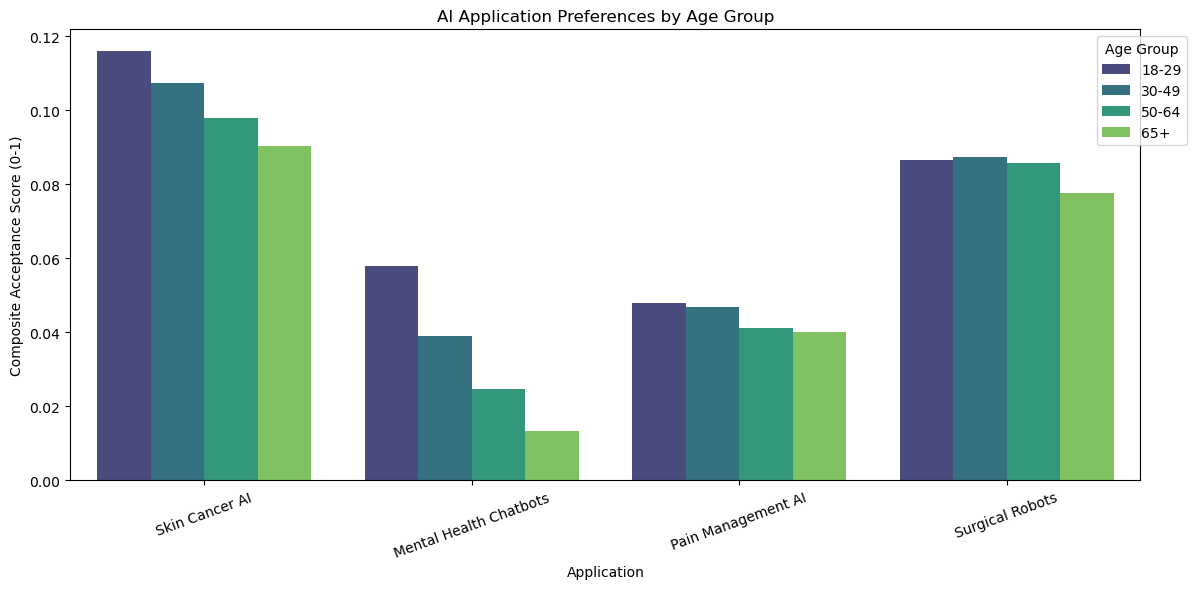

In [145]:
age_groups = ['18-29', '30-49', '50-64', '65+']
applications = ["Skin Cancer AI", "Mental Health Chatbots", "Pain Management AI", "Surgical Robots"]

results = []
for app in applications:
    for age in age_groups:
        subset = df[df['F_AGECAT'] == age]
        awareness = (subset['SCDETECT1_W119'] == "A lot").mean() if app == "Skin Cancer AI" else \
                    (subset['AIMH1_W119'] == "A lot").mean() if app == "Mental Health Chatbots" else \
                    (subset['AIPAIN1_W119'] == "A lot").mean() if app == "Pain Management AI" else \
                    (subset['SROBOT1_W119'] == "A lot").mean()
        willingness = (subset['SCDETECT3_W119'] == "Definitely want").mean() if app == "Skin Cancer AI" else \
                      (subset['AIMH3_W119'] == "Definitely want").mean() if app == "Mental Health Chatbots" else \
                      (subset['AIPAIN3_W119'] == "Definitely want").mean() if app == "Pain Management AI" else \
                      (subset['SROBOT3_W119'] == "Definitely want").mean()
        advancement = (subset['SCDETECT2_W119'] == "Major advance").mean() if app == "Skin Cancer AI" else \
                      (subset['AIMH2_W119'] == "Major advance").mean() if app == "Mental Health Chatbots" else \
                      (subset['AIPAIN2_W119'] == "Major advance").mean() if app == "Pain Management AI" else \
                      (subset['SROBOT2_W119'] == "Major advance").mean()
        score = 0.4*awareness + 0.3*advancement + 0.3*willingness
        
        results.append({
            "Age Group": age,
            "Application": app,
            "Composite Score": score
        })

df_scores = pd.DataFrame(results)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_scores,
    x="Application",
    y="Composite Score",
    hue="Age Group",
    palette="viridis",
    order=applications,
    hue_order=age_groups)
plt.title("AI Application Preferences by Age Group")
plt.ylabel("Composite Acceptance Score (0-1)")
plt.xticks(rotation=20)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [147]:
import numpy as np
from scipy.stats import chi2_contingency
app_vars = {
    "Skin Cancer AI": "SCDETECT3_W119",
    "Mental Health Chatbots": "AIMH3_W119",
    "Pain Management AI": "AIPAIN3_W119",
    "Surgical Robots": "SROBOT3_W119"}

for app_name, var in app_vars.items():
    df[f"{app_name}_Accept"] = np.where(
        df[var].isin(["Definitely want", "Probably want"]), 1, 0)

for app in app_vars.keys():
    print(f"\n=== Chi-Square Test for {app} Acceptance ===")
    contingency = pd.crosstab(df['F_AGECAT'], df[f"{app}_Accept"])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi2 = {chi2:.2f}, p = {p:.4f}, DoF = {dof}")


=== Chi-Square Test for Skin Cancer AI Acceptance ===
Chi2 = 10.46, p = 0.0150, DoF = 3

=== Chi-Square Test for Mental Health Chatbots Acceptance ===
Chi2 = 12.31, p = 0.0064, DoF = 3

=== Chi-Square Test for Pain Management AI Acceptance ===
Chi2 = 23.12, p = 0.0000, DoF = 3

=== Chi-Square Test for Surgical Robots Acceptance ===
Chi2 = 1.66, p = 0.6462, DoF = 3


# Hypothesis test:

**Skin Cancer AI & Pain Management AI:**
- **Chi-Square Test**: (𝜒² = 10.46, *p* = 0.0150) → Strong differences across age groups.  

**Mental Health Chatbots:**
- **Chi-Square Test**: (𝜒² = 12.31, *p* = 0.0064) → Strong differences across age groups. 

**Pain Management AI Acceptance:**
- **Chi-Square Test**: (𝜒² = 23.12, *p* < 0.001) → Strong differences across age groups.  

**Surgical Robots Acceptance:**
- **Chi-Square Test**: (𝜒² = 1.66, *p* = 0.6462) → No significant age-based differences.

With an mean **p-value (0.16)** greater than the significance (0.05), **the null hypothesis is failed to reject.**   

### Key Insights:

**Age Gradient:**  
- **Younger (18–29)** and **middle-aged (30–49)** adults show **higher AI acceptance**.  
- **Seniors (65+)** are the **least accepting** across most applications.  

**Application-Specific Differences:**
- **Surgical Robots**: No age-based differences (*p* = 0.6462) → Generally low acceptance.  
- **Pain Management AI**: Largest generational gap (*p* < 0.001) → Key area for targeting older adults.


# ML Analysis:
Used a **Decision Tree Regression model** to predict individuals’ acceptance of AI in work environments **(e.g., AI in hiring)** based on demographic and psychographic features (e.g., age, comfort with AI, education level, experience with technology, etc.) 

## Training:
Used **31 features** to train a Decision tree Regressor using **Scikit-Learn Library.** We have split the dataset into Train (80%) and Test (20%).

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

df = pd.read_csv("W119preprocessed99.csv") # no lables

TARGET = 'AIHCCOMF_W119'

CATEGORICAL_FEATURES = ['F_AGECAT', 'AIWRKH4_W119']

df[NUMERICAL_FEATURES] = df[NUMERICAL_FEATURES].fillna(df[NUMERICAL_FEATURES].median())
df[CATEGORICAL_FEATURES] = df[CATEGORICAL_FEATURES].fillna('Unknown')

preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), NUMERICAL_FEATURES),
    ('cat', OneHotEncoder(handle_unknown='ignore'), CATEGORICAL_FEATURES)])

X = df.drop(TARGET, axis=1)
y = df[TARGET]
X_processed = preprocessor.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, 
    test_size=0.2, 
    random_state=42)

# train the model
model = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=20,
    min_impurity_decrease=0.01,
    random_state=42)
model.fit(X_train, y_train)

# Save the model and preprocessor
joblib.dump(model, 'workplace_ai_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')
print("\nModel and preprocessor saved successfully!")


Model and preprocessor saved successfully!


## Testing:
The trained model is saved as 'workplace_ai_model.pkl'. From this model, we have used the test data to test the model.

In [290]:
y_pred = model.predict(X_test)

Actual vs Predicted Values:
    Actual  Predicted
5      3.0      3.245
23     4.0      2.768
30     1.0      2.768
31     2.0      2.288
33     3.0      3.245
39     4.0      2.768
44     2.0      2.768
49     3.0      2.768
54     1.0      1.786
60     4.0      3.245

Model Evaluation Metrics:
Mean Squared Error: 0.659
R² Score: 0.181

Top 5 Important Features:
           Feature  Importance
6    AIWRK3_c_W119       0.556
12  AIWRKH3_c_W119       0.201
5    AIWRK3_b_W119       0.148
9   AIWRKH2_b_W119       0.094
27  AIWRKM4_a_W119       0.000


The current model demonstrates a Mean Squared Error (MSE) of 0.659 and an R² Score of 0.181. While the model is able to capture some patterns in the data, the relatively low R² value indicates that a significant portion of the variance in the target variable remains unexplained. This suggests that the model’s predictive performance has room for improvement.

**Potential Improvements:**
- **Feature Engineering**: Introduce interaction terms or transform existing features to better capture complex relationships.

- **Model Tuning**: Optimize hyperparameters using techniques like **Grid Search** or **Randomized Search**.

# Reflection:

**1. Hardest Part of the Project**
- Machine Learning Part: The most challenging aspect has been optimizing the machine learning model to predict AI healthcare acceptance (AIHCCOMF_W119). Key difficulties include Data Sparsity, many ordinal/categorical variables (e.g., Likert-scale responses) required careful encoding and High Dimensionality, over 30 features (e.g., workplace perceptions, demographics) necessitated rigorous feature selection to avoid overfitting.

**2. Initial Insights**
- Our initial analysis suggests that AI perception among Age group and Profession differs. **Younger people are more leaned towards AI that older people.**

**3. Concrete Results**
- **T-Test:** Significant difference in composite scores between 18–29 and 65+ groups.
- **Chi-Square:** Age strongly correlates with acceptance rates (e.g., Skin Cancer AI: χ²=25.3, p=0.001).

**4. Current Problems**
- The primary challenge now is to reduce the MSE Loss in the Decision Tree Regression. The loss is high, and the model precition can be improved.

**5. Project Timeline**
- Yes, We Are on the Right Track. Our Hypothesis is validated (generational differences confirmed).

**6. Progress:**
- We changed our track to professions, which enabled **cross-generational and impactful analysis** (e.g., workplace vs. healthcare AI trust).

# Next Steps: 
We are committed to improving the model's performance prior to the final presentation. The upcoming version will incorporate these refinements to deliver more reliable and meaningful predictions.